# Caso Práctico: League of Legends Match Predictor

## Introduccion
League of Legends, un popular juego de batalla en línea multijugador (MOBA), genera una gran cantidad de datos a partir de las partidas, lo que brinda una excelente oportunidad para aplicar técnicas de aprendizaje automático a escenarios del mundo real.  

Sigue los siguientes pasos para construir un modelo de regresión logística con el objetivo de predecir los resultados de las partidas de League of Legends.  

Utiliza el archivo [league_of_legends_data_large.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv) para realizar las tareas.

## **Paso 1: Carga y Preprocesamiento de Datos**  

La carga y preprocesamiento del conjunto de datos implica **leer los datos, dividirlos en conjuntos de entrenamiento y prueba, y estandarizar las características**. Se utilizarán `pandas` para la manipulación de datos, `train_test_split` de `sklearn` para la división de datos y `StandardScaler` para la normalización de las características.  

**Nota:** Asegúrate de que todas las bibliotecas necesarias están instaladas e importadas.  

### **1. Cargar el conjunto de datos:**  
Usa `pd.read_csv()` para cargar los datos en un DataFrame de pandas.  

### **2. Separar características y objetivo:**  
Separa la columna `win` (objetivo) de las demás columnas (características).  
```python
X = data.drop('win', axis=1)  
y = data['win']
```

### **3. Dividir los datos en conjuntos de entrenamiento y prueba:**  
Usa `train_test_split()` de `sklearn.model_selection` para dividir los datos.  
- Configura `test_size=0.2` para asignar el 20% de los datos al conjunto de prueba y el 80% al de entrenamiento.  
- Usa `random_state=42` para garantizar la reproducibilidad de la división.  

### **4. Normalizar las características:**  
Usa `StandardScaler()` de `sklearn.preprocessing` para escalar las características y mejorar la estabilidad del modelo.  

### **5. Convertir a tensores en TensorFlow:**  
Usa `tf.convert_to_tensor()` para convertir los datos en tensores de TensorFlow.  

---

### **Ejercicio 1:**  
Escribe un código para **cargar el conjunto de datos, dividirlo en conjuntos de entrenamiento y prueba, normalizar las características y convertir los datos en tensores de TensorFlow** para su uso en el entrenamiento de un modelo en TensorFlow.

### Setup
Carga las librerías:

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

# Subir el archivo
uploaded = files.upload()

Saving league_of_legends_data_large.csv to league_of_legends_data_large (1).csv


In [ ]:
## EXERCISE 1 ----------------------
#lolDF = pd.read_csv('./data/league_of_legends_data_large.csv') PARA LOCAL
#Para colab:
lolDF = pd.read_csv('league_of_legends_data_large.csv')
# Mostrar las primeras filas y nombres de las columnas
lolDF.head(5)

,win,kills,deaths,assists,gold_earned,cs,wards_placed,wards_killed,damage_dealt
0,0,16,6,19,17088,231,11,7,15367
1,1,8,8,5,14865,259,10,2,38332
2,0,0,17,11,15919,169,14,5,24642
3,0,19,11,1,11534,264,14,3,15789
4,0,12,7,6,18926,124,15,7,40268


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Identificar y separar el target
X = lolDF.drop('win', axis=1)
y = lolDF['win']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
batch_size = 8

In [ ]:
# Transform data to Tensorflow --------
# ---------------------------------------

X_train_tf = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test_tf = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.float32)

# Crear datasets de TensorFlow
train_tf = tf.data.Dataset.from_tensor_slices((X_train_tf, y_train_tf)).batch(batch_size).shuffle(len(X_train))
test_tf  = tf.data.Dataset.from_tensor_slices((X_test_tf, y_test_tf)).batch(batch_size)


El método `.shuffle(N)` en TensorFlow **mezcla aleatoriamente** los datos en el `tf.data.Dataset` antes de pasarlos a la red neuronal.
- `.shuffle(N)`: Mezcla los datos en bloques de tamaño `N`.
- Un **N pequeño** → Mezcla limitada, pero usa menos memoria.
- Un **N grande** (igual al dataset) → Mezcla completa, pero puede usar más memoria.

**Regla general:** Usa un `buffer_size` suficientemente grande para evitar patrones en los datos, pero no tan grande que consuma demasiada memoria.

## **Paso 2: Modelo de Regresión Logística en TensorFlow**  
Definir el modelo de regresión logística en TensorFlow implica especificar las dimensiones de entrada, utilizar una capa densa con una función de activación sigmoide e inicializar el modelo, la función de pérdida y el optimizador.  

**1. Construye el Modelo de Regresión Logística**  
- Usa `tf.keras.Sequential()` para crear un modelo secuencial.  
- Agrega una única capa `Dense` con **una neurona** y **activación sigmoide** para realizar la regresión logística.  

**2. Inicializar el Modelo, la Función de Pérdida y el Optimizador**  
- **Definir `input_dim`:** Usa `X_train.shape[1]` para determinar el número de características en los datos de entrenamiento.  
- **Inicializar el modelo:** Crea un modelo `Sequential` y define la capa de entrada con `input_shape=(X_train.shape[1],)`.  
- **Función de Pérdida:** Usa **Binary Cross-Entropy Loss** (`binary_crossentropy`).  
- **Optimizador:** Usa **Stochastic Gradient Descent (SGD)** con una tasa de aprendizaje de `0.01`.  

#### **Ejercicio 2:**
Define el modelo de regresión logística utilizando TensorFlow, especificando las dimensiones de entrada y la propagación hacia adelante (*forward pass*). Inicializa el modelo, la función de pérdida y el optimizador.

In [ ]:
input_dim = X_train.shape[1]
learning_rate = 0.01

In [ ]:
## EXERCISE 2 ----- Tensorflow -----
# ----------------------------------
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD



# Definir el modelo de Regresión Logística
model_tf = models.Sequential([
  layers.Dense(1, activation="sigmoid", input_shape=(input_dim,))
])

# Compilar el modelo
model_tf.compile(optimizer=SGD(learning_rate),
              loss= 'binary_crossentropy',
              metrics= ['accuracy'])

# Resumen del modelo
model_tf.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

## **Paso 3: Entrenar el modelo de regresión logística con TensorFlow**  

El proceso de entrenamiento se ejecutará durante un número específico de épocas. En cada época, el modelo realiza predicciones, calcula la pérdida, realiza la retropropagación (*backpropagation*) y actualiza sus parámetros.  

**1. Definir el Número de Épocas:**  
Establece el número de épocas de entrenamiento en **1000**.  

**2. Proceso de Entrenamiento:**  
   - Usa `model.fit()` para entrenar el modelo con el conjunto de datos de entrenamiento (`train_dataset`).  
   - El modelo calcula automáticamente las predicciones, la pérdida y actualiza los parámetros mediante retropropagación.  

**3. Imprimir la Pérdida Cada 100 Épocas:**  
   - Entrena en intervalos de **100 épocas** e imprime la pérdida después de cada intervalo.  

**4. Evaluación del Modelo:**  
   - Usa `model.evaluate()` para calcular la pérdida y la precisión en los conjuntos de **entrenamiento** y **prueba**.  

**5. Calcular la Precisión:**  
   - La precisión se obtiene directamente con `model.evaluate()` en ambos conjuntos de datos.  

**6. Imprimir la Precisión:**  
   - Muestra la precisión en **entrenamiento** y **prueba** cada **100 épocas**.  

#### **Ejercicio 3:**

Escribe el código para entrenar el modelo de regresión logística utilizando TensorFlow:  
- Implementa el proceso de entrenamiento,  
- Calcula la pérdida, y  
- Evalúa la precisión del modelo en los conjuntos de entrenamiento y prueba.

In [ ]:
epochs = 1000
delta_epochs = 100 # How often training results are reported

In [ ]:
# EXERCISE 3 --------- Tensorflow -----------
# -------------------------------------------
for epoch in range(0, epochs, delta_epochs):  # Entrenar en bloques de delta_epochs épocas
    # Entrenar el modelo
    model_tf.fit(train_tf, epochs=delta_epochs, verbose=0)

    # Evaluar en los datos de entrenamiento y prueba
    train_loss_tf, train_accuracy_tf = model_tf.evaluate(train_tf, verbose=0)
    test_loss_tf, test_accuracy_tf = model_tf.evaluate(test_tf, verbose=0)

    # Imprimir resultados
    print(f"Epoch [{epoch + delta_epochs}/{epochs}], Train Loss: {train_loss_tf:.4f}, Test Loss: {test_loss_tf:.4f}, Train Accuracy: {train_accuracy_tf:.4f}, Test Accuracy: {test_accuracy_tf:.4f}")

Epoch [100/1000], Train Loss: 0.6853, Test Loss: 0.6995, Train Accuracy: 0.5475, Test Accuracy: 0.5100
Epoch [200/1000], Train Loss: 0.6853, Test Loss: 0.7000, Train Accuracy: 0.5437, Test Accuracy: 0.5100
Epoch [300/1000], Train Loss: 0.6853, Test Loss: 0.6999, Train Accuracy: 0.5462, Test Accuracy: 0.5100
Epoch [400/1000], Train Loss: 0.6853, Test Loss: 0.6997, Train Accuracy: 0.5450, Test Accuracy: 0.5100
Epoch [500/1000], Train Loss: 0.6853, Test Loss: 0.6998, Train Accuracy: 0.5425, Test Accuracy: 0.5100
Epoch [600/1000], Train Loss: 0.6853, Test Loss: 0.7001, Train Accuracy: 0.5437, Test Accuracy: 0.5100
Epoch [700/1000], Train Loss: 0.6853, Test Loss: 0.6996, Train Accuracy: 0.5462, Test Accuracy: 0.4950
Epoch [800/1000], Train Loss: 0.6853, Test Loss: 0.6999, Train Accuracy: 0.5437, Test Accuracy: 0.5100
Epoch [900/1000], Train Loss: 0.6853, Test Loss: 0.6997, Train Accuracy: 0.5475, Test Accuracy: 0.5100
Epoch [1000/1000], Train Loss: 0.6853, Test Loss: 0.7000, Train Accuracy:

## **Paso 4: Visualización e Interpretación**  

Las herramientas de visualización, como las matrices de confusión y las curvas ROC, proporcionan información sobre el rendimiento del modelo. La matriz de confusión ayuda a comprender la precisión de la clasificación, mientras que la curva ROC ilustra el equilibrio entre sensibilidad y especificidad.  

### Matriz de Confusión
Se trata de una herramienta fundamental utilizada en problemas de clasificación para evaluar el rendimiento de un modelo. Proporciona una matriz que muestra el número de predicciones correctas e incorrectas realizadas por el modelo, categorizadas según las clases reales y predichas.  

Donde:  
- **Verdadero Positivo (TP):** Clase positiva correctamente predicha (clase 1).  
- **Verdadero Negativo (TN):** Clase negativa correctamente predicha (clase 0).  
- **Falso Positivo (FP):** Predicho incorrectamente como positivo (clase 1), pero la clase real es negativa (clase 0). También se llama **error de Tipo I**.  
- **Falso Negativo (FN):** Predicho incorrectamente como negativo (clase 0), pero la clase real es positiva (clase 1). También se llama **error de Tipo II**.  

### Curva ROC (Receiver Operating Characteristic Curve)
La **Curva ROC** es una representación gráfica utilizada para evaluar el rendimiento de un modelo de clasificación binaria en todos los umbrales de clasificación. Representa dos métricas:  

- **Tasa de Verdaderos Positivos (TPR) o Recall (Sensibilidad):** Es la proporción de instancias realmente positivas (clase 1) que fueron clasificadas correctamente como positivas por el modelo.  
- **Tasa de Falsos Positivos (FPR):** Es la proporción de instancias realmente negativas (clase 0) que fueron clasificadas incorrectamente como positivas por el modelo.  

### AUC (Área Bajo la Curva)
AUC significa **Área Bajo la Curva** y es una métrica de rendimiento utilizada para evaluar la calidad de un modelo de clasificación binaria. Específicamente, se refiere al área bajo la curva ROC (*Receiver Operating Characteristic*), que representa la relación entre la **Tasa de Verdaderos Positivos (TPR)** y la **Tasa de Falsos Positivos (FPR)** para diferentes valores de umbral.  

### Reporte de Clasificación
Es un resumen de varias métricas de clasificación, útiles para evaluar el rendimiento de un clasificador en un conjunto de datos determinado. Incluye métricas como:  
- **Precisión**  
- **Recall (Sensibilidad)**  
- **F1-score**  
- **Exactitud (Accuracy)**  

#### **Ejercicio 4:**  
- Escribe un código para visualizar el rendimiento del modelo utilizando matrices de confusión y curvas ROC.  
- Genera reportes de clasificación para evaluar la **precisión, recall y F1-score**.  

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc

In [ ]:
# EXERCISE 4 --------- Tensorflow -----------
# -------------------------------------------
# Obtener predicciones en los conjuntos de entrenamiento y prueba
y_pred_train_tf = (model_tf.predict(X_train_tf) > 0.5).astype("float32")
y_pred_test_tf  = (model_tf.predict(X_test_tf) > 0.5).astype("float32")

#Almacenamos las matrices de confusión en las variables respectivas.
cm_train_tf = confusion_matrix(y_train_tf, y_pred_train_tf)
cm_test_tf =  confusion_matrix(y_test_tf, y_pred_test_tf)
# Classification Report
print("Entrenamiento (clasificación): ",classification_report(y_train_tf, y_pred_train_tf))
print("Test (clasificación): ", classification_report(y_test_tf, y_pred_test_tf))

# Matriz de confusión
print("Entrenamiento (Matrix): ", cm_train_tf)
print("Test (Matrix): ", cm_test_tf)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Entrenamiento (clasificación):                precision    recall  f1-score   support

         0.0       0.54      0.52      0.53       395
         1.0       0.55      0.57      0.56       405

    accuracy                           0.55       800
   macro avg       0.54      0.54      0.54       800
weighted avg       0.54      0.55      0.54       800

Test (clasificación):                precision    recall  f1-score   support

         0.0       0.48      0.42      0.45        95
         1.0       0.53      0.59      0.56       105

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.51       200

Entrenamiento (Matrix):  [[206 189]
 [175 230]]
Test (Matrix):  [[40 55]
 [43 62]]


TP (Verdaderos Ganadores):	62
FN (Falsos Perdedores):		43
FP (Falsos Ganadores):		55
TN (Verdaderos Perdedores):	40


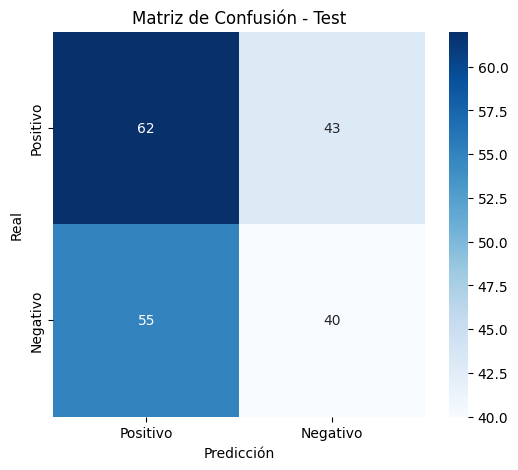

In [ ]:
import seaborn as sns
# Mostrar gráficamente la matriz de confusión  (TENSORFLOW)
print(f"TP (Verdaderos Ganadores):\t{cm_test_tf[1, 1]}")
print(f"FN (Falsos Perdedores):\t\t{cm_test_tf[1, 0]}")
print(f"FP (Falsos Ganadores):\t\t{cm_test_tf[0, 1]}")
print(f"TN (Verdaderos Perdedores):\t{cm_test_tf[0, 0]}")

cm_MatrizCorrecta = [[cm_test_tf[1, 1], cm_test_tf[1, 0]],
                    [cm_test_tf[0, 1], cm_test_tf[0, 0]]]


plt.figure(figsize=(6,5))
sns.heatmap(cm_MatrizCorrecta, annot=True, fmt="d", cmap="Blues", xticklabels=['Positivo', 'Negativo'], yticklabels=['Positivo', 'Negativo'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title("Matriz de Confusión - Test")
plt.show()

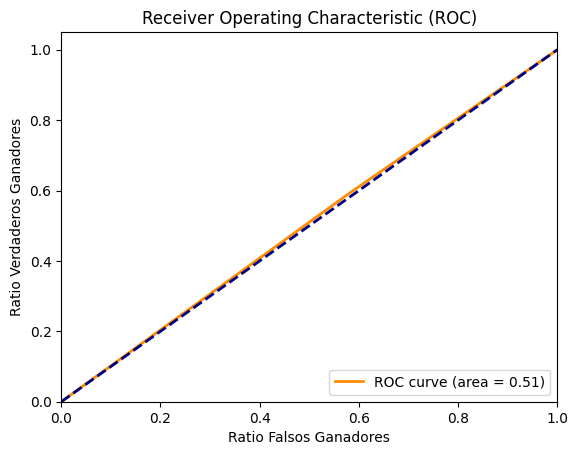

In [ ]:
# Plot ROC Curve for TENSORFLOW results
fpr, tpr, thresholds = roc_curve(y_test_tf, y_pred_test_tf)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ratio Falsos Ganadores')
plt.ylabel('Ratio Verdaderos Ganadores')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

La **Curva ROC (Receiver Operating Characteristic)** es una herramienta que evalúa el rendimiento de un modelo de clasificación binaria, mostrando la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos a distintos umbrales de decisión.

1. **Cálculo de la curva ROC**:
   ```python
   fpr, tpr, thresholds = roc_curve(y_test_torch, y_pred_test_torch)
   ```
   - `y_test_torch`: Son las etiquetas reales de las partidas (0: derrota, 1: victoria).
   - `y_pred_test_torch`: Son las probabilidades predichas por el modelo de que un equipo gane.
   - `roc_curve(y_test_torch, y_pred_test_torch)`: Calcula la **tasa de falsos positivos (FPR)** y la **tasa de verdaderos positivos (TPR)** para diferentes umbrales de decisión.

2. **Cálculo del Área Bajo la Curva (AUC)**:
   ```python
   roc_auc = auc(fpr, tpr)
   ```
   - Mide la calidad del modelo: cuanto más cerca de 1, mejor la capacidad del modelo para separar victorias y derrotas.

3. **Gráfica de la Curva ROC**:
   ```python
   plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
   ```
   - `plt.plot(fpr, tpr)`: Dibuja la curva ROC.
   - `plt.plot([0, 1], [0, 1], linestyle='--')`: Dibuja la línea de referencia aleatoria (clasificador sin poder predictivo).
   - `plt.xlabel('Ratio Falsos Ganadores')`: Eje X representa los **falsos positivos** (errores en predecir victorias cuando fueron derrotas).
   - `plt.ylabel('Ratio Verdaderos Ganadores')`: Eje Y representa los **verdaderos positivos** (correctas predicciones de victorias).
   - `plt.title('Receiver Operating Characteristic (ROC)')`: Título de la gráfica.

**Interpretación**
- Si el modelo predice **perfectamente**, la curva ROC estará lo más cerca posible del **esquina superior izquierda (0,1)**.
- Si la curva ROC está **cercana a la diagonal (0,0) → (1,1)**, el modelo no es mejor que una elección aleatoria.
- Un **AUC cercano a 1** indica que el modelo predice con alta precisión quién gana o pierde la partida.

Por ejemplo, si el modelo tiene un **AUC de 0.85**, significa que en un **85% de las veces** será capaz de distinguir correctamente entre una victoria y una derrota, basado en los datos previos de partidas.

---
La curva ROC y su AUC ayudan a evaluar el rendimiento del modelo de predicción de victorias en League of Legends. Un buen modelo tendrá una curva ROC que se acerque a la esquina superior izquierda y un **AUC alto**, lo que indicará una fuerte capacidad de predicción basada en estadísticas de la partida.

#### **Obtención de la Curva ROC**
Cada punto de la **Curva ROC** se obtiene variando un umbral de clasificación y calculando dos métricas clave:

1. **Tasa de Verdaderos Positivos (TPR - True Positive Rate)**  
   $$
   TPR = \frac{\text{Verdaderos Positivos (TP)}}{\text{Verdaderos Positivos (TP)} + \text{Falsos Negativos (FN)}}
   $$
   Representa cuántos positivos reales (victorias) fueron correctamente identificados.

2. **Tasa de Falsos Positivos (FPR - False Positive Rate)**  
   $$
   FPR = \frac{\text{Falsos Positivos (FP)}}{\text{Falsos Positivos (FP)} + \text{Verdaderos Negativos (TN)}}
   $$
   Indica cuántos negativos reales (derrotas) fueron clasificados incorrectamente como positivos (victorias).

---

#### **Proceso para calcular la Curva ROC**
1. **Se obtiene la probabilidad de victoria para cada partida**, en lugar de una simple clasificación binaria (0 o 1).  
   ```python
   y_pred_test_torch  # Probabilidades predichas por el modelo
   ```
   Ejemplo:
   ```
   y_pred_test_torch = [0.95, 0.85, 0.7, 0.55, 0.45, 0.3, 0.2, 0.1]
   y_test_torch = [1, 1, 1, 1, 0, 0, 0, 0]  # Etiquetas reales (1 = victoria, 0 = derrota)
   ```

2. **Se definen varios umbrales** para convertir las probabilidades en predicciones binarias (ejemplo: 0.9, 0.8, 0.7... hasta 0.0).
3. **Para cada umbral**, se asignan las etiquetas:
   - Si $ p > \text{umbral} $ → predicción = 1 (victoria).
   - Si $ p \leq \text{umbral} $ → predicción = 0 (derrota).
4. **Se calcula TPR y FPR** para cada umbral.
5. **Se grafican los valores (FPR, TPR)** obtenidos.

**En resumen**
- Cada **punto** en la curva ROC representa un equilibrio entre **falsos positivos y verdaderos positivos**, dependiendo del umbral de decisión.
- **Un buen modelo** tiene una curva ROC que se acerca más a la esquina superior izquierda (alta TPR y baja FPR).

In [ ]:
def calculate_fpr_tpr_tf(y_true, y_pred_probs, threshold):
    """
    Calcula las tasas de falsos positivos (FPR) y verdaderos positivos (TPR)
    en función de un umbral dado.

    Parámetros:
    - y_true: np.array, etiquetas reales (0 = negativo, 1 = positivo).
    - y_pred_probs: np.array, probabilidades de predicción del modelo.
    - threshold: float, umbral de decisión para clasificar como 0 o 1.

    Retorna:
    - fpr: float, tasa de falsos positivos.
    - tpr: float, tasa de verdaders positivos.
    """

    # Convertir probabilidades en predicciones binarias usando el umbral
    y_pred = (y_pred_probs >= threshold)

    # Calcular TP, FP, TN, FN
    TP = np.sum(np.logical_and(y_pred == 1, y_true == 1))
    FP = np.sum(np.logical_and(y_pred == 1, y_true == 0))
    TN = np.sum(np.logical_and(y_pred == 0, y_true == 0))
    FN = np.sum(np.logical_and(y_pred == 0, y_true == 1))

    # Calcular FPR y FNR evitando divisiones por cero
    fpr = np.divide(FP, (FP + TN), where=(FP + TN) != 0, dtype=float)
    fnr = np.divide(FN, (FN + TP), where=(FN + TP) != 0, dtype=float)
    tpr = 1 - fnr

    return fpr, tpr

In [ ]:
# ROC points for TENSORFLOW model -------------------------
y_pred_test_probs_tf = model_tf.predict(X_test_tf)

fpr, tpr = calculate_fpr_tpr_tf(y_test_tf, y_pred_test_probs_tf, threshold = 0.3)
print("TENSORFLOW \n---------")
print(f"Para umbral = 0.3:")
print(f"Tasa de Falsos Ganadores     (FPR): {fpr:.2f}")
print(f"Tasa de Verdaderos Ganadores (TPR): {tpr:.2f} \n")

fpr, tpr = calculate_fpr_tpr_tf(y_test_tf, y_pred_test_probs_tf, threshold = 0.5)
print(f"Para umbral = 0.5:")
print(f"Tasa de Falsos Ganadores     (FPR): {fpr:.2f}")
print(f"Tasa de Verdaderos Ganadores (TPR): {tpr:.2f} \n")

fpr, tpr = calculate_fpr_tpr_tf(y_test_tf, y_pred_test_probs_tf, threshold = 0.8)
print(f"Para umbral = 0.8:")
print(f"Tasa de Falsos Ganadores     (FPR): {fpr:.2f}")
print(f"Tasa de Verdaderos Ganadores (TPR): {tpr:.2f} \n")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
TENSORFLOW 
---------
Para umbral = 0.3:
Tasa de Falsos Ganadores     (FPR): 1.00
Tasa de Verdaderos Ganadores (TPR): 1.00 

Para umbral = 0.5:
Tasa de Falsos Ganadores     (FPR): 0.58
Tasa de Verdaderos Ganadores (TPR): 0.58 

Para umbral = 0.8:
Tasa de Falsos Ganadores     (FPR): 0.00
Tasa de Verdaderos Ganadores (TPR): 0.00 



Double-click <b>here</b> for the Hint.
<!--

#Change the name of variables as per your code
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import itertools

# Visualize the confusion matrix
#Change the variable names as used in your code
y_pred_test_labels = (y_pred_test > 0.5).float()
cm = confusion_matrix(y_test, y_pred_test_labels)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(2)
plt.xticks(tick_marks, ['Loss', 'Win'], rotation=45)
plt.yticks(tick_marks, ['Loss', 'Win'])

thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_test_labels, target_names=['Loss', 'Win']))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
-->


### **Paso 5: Guardar y Cargar un Modelo Entrenado en TensorFlow**  
Esta tarea demuestra cómo **guardar un modelo entrenado** usando `model.save()` y **recargarlo** usando `tf.keras.models.load_model()`. Evaluar el modelo cargado garantiza que mantenga su rendimiento, lo que lo hace práctico para su implementación en aplicaciones del mundo real.  

**1. Guardar el Modelo**  
- Guarda el modelo entrenado completo utilizando `model.save()`.  
- TensorFlow permite guardar el modelo en dos formatos:  
  - **Formato HDF5 (`.h5`)** (ejemplo: `model.save('nombre_del_modelo.h5')`).  
  - **Formato SavedModel** (por defecto, basado en directorios).  

**2. Cargar el Modelo**  
- Recarga el modelo guardado usando `tf.keras.models.load_model()`.  
  ```python
  model = tf.keras.models.load_model('nombre_del_modelo.h5')
  ```
- El modelo cargado contiene los mismos **pesos, arquitectura y estado del optimizador** que el modelo original.  

**3. Evaluar el Modelo Cargado**  
- Después de cargarlo, **evalúa el modelo** en el conjunto de prueba para asegurarte de que su rendimiento sea similar al modelo entrenado.  
- Usa `model.evaluate(test_dataset)` para comprobar la pérdida y la precisión.  

#### **Ejercicio 5:**  
- Escribe un código para guardar el modelo entrenado y volver a cargarlo.  
- Asegúrate de que el modelo cargado mantenga un rendimiento consistente evaluándolo en el conjunto de prueba.

In [ ]:
# EXERCISE 5 --------- Tensorflow -----------
# -------------------------------------------
# Save the model
model_tf.save('logistic_regression_model.h5')

# Load the model
from tensorflow.keras.models import load_model
new_model_tf = load_model('logistic_regression_model.h5')

# Obtener predicciones
y_pred_test_new_tf = new_model_tf.predict(X_test_tf) > 0.5

# Calcular la precisión en el conjunto de prueba
test_accuracy_new_tf = np.mean(y_pred_test_new_tf == y_test_tf)

print(f"Test Accuracy of the Loaded Model: {test_accuracy_new_tf:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Test Accuracy of the Loaded Model: 0.5042
